# 2025/8/18 樞紐分析-資料整理分段解析

In [2]:
import pandas as pd
df = pd.read_excel('新竹市重要遊憩據點遊客人次統計.xlsx')
df = df.drop(columns=['Countycode', 'YYYMM'])
df = df.round()#四捨五入，而且可以指定小數位數。
df = df.astype('int64')
df['民國年月']=df['民國年月'].astype('string')
df_unpivoted = pd.melt(df, 
                      id_vars=['民國年月'],
                      value_vars=df.columns.values[1:],
                      var_name='據點',
                      value_name='人數')
df_unpivoted['據點']=df_unpivoted['據點'].astype('string')
df_unpivoted
# 統計歷年來各據點的來客總人數
# 統計108年各據點的來客總人數

# 1. 統計歷年來各據點的來客總人數
total_by_branch_year = df_unpivoted.groupby(['據點'])['人數'].sum().reset_index()
print("歷年各據點來客總人數:")
print(total_by_branch_year.to_string(index=False))

# 2. 統計108年各據點的來客總人數
year_108_stats = df_unpivoted[df_unpivoted['民國年月'].str.slice(0,3) == '108'].groupby('據點')['人數'].sum().reset_index()
print("\n108年各據點來客總人數:")
print(year_108_stats.to_string(index=False))

歷年各據點來客總人數:
        據點       人數
十七公里自行車道人次  2512886
    十八尖山人次  5948596
     城隍廟人次 11013941
    新竹公園人次 10163125
    新竹漁港人次 18171957
    賞蟹步道人次  1997356
     青草湖人次  1302226
    青青草原人次  1496831

108年各據點來客總人數:
        據點      人數
十七公里自行車道人次  216106
    十八尖山人次 1809331
     城隍廟人次 2513560
    新竹公園人次  363413
    新竹漁港人次 3659147
    賞蟹步道人次  250774
     青草湖人次  197207
    青青草原人次  385403


,民國年月,據點,人數
0,10801,十八尖山人次,138881
1,10802,十八尖山人次,137512
2,10803,十八尖山人次,101301
3,10804,十八尖山人次,186020
4,10805,十八尖山人次,160695
...,...,...,...
475,11208,新竹公園人次,296642
476,11209,新竹公園人次,299460
477,11210,新竹公園人次,344045
478,11211,新竹公園人次,317921


In [3]:
df_unpivoted
df=df_unpivoted.pivot(index='民國年月', columns='據點')['人數']
df

據點,十七公里自行車道人次,十八尖山人次,城隍廟人次,新竹公園人次,新竹漁港人次,賞蟹步道人次,青草湖人次,青青草原人次
民國年月,,,,,,,,
10801,7538,138881,186932,16902,226935,8574,14436,22226
10802,17081,137512,251404,42939,219437,20629,16169,40034
10803,8621,101301,157317,26910,241011,20187,12116,32227
10804,18440,186020,205830,26210,272600,29660,17830,64880
10805,26268,160695,212146,21465,309255,24648,15267,30172
10806,25789,169084,187465,20129,331952,28083,20814,31216
10807,14751,144669,198434,15135,244742,17773,11831,22904
10808,22155,135557,231224,31347,355109,39719,11184,26594
10809,12789,127176,195564,16797,383046,18363,10686,20196


In [4]:
df_unpivoted['年']=df_unpivoted['民國年月'].str.slice(0,3)
df_unpivoted['月']=df_unpivoted['民國年月'].str.slice(3,5)
df_unpivoted

,民國年月,據點,人數,年,月
0,10801,十八尖山人次,138881,108,01
1,10802,十八尖山人次,137512,108,02
2,10803,十八尖山人次,101301,108,03
3,10804,十八尖山人次,186020,108,04
4,10805,十八尖山人次,160695,108,05
...,...,...,...,...,...
475,11208,新竹公園人次,296642,112,08
476,11209,新竹公園人次,299460,112,09
477,11210,新竹公園人次,344045,112,10
478,11211,新竹公園人次,317921,112,11


In [5]:
table = pd.pivot_table(df_unpivoted, values='人數', index=['年'],
                       columns=['據點'], aggfunc="sum")
table

據點,十七公里自行車道人次,十八尖山人次,城隍廟人次,新竹公園人次,新竹漁港人次,賞蟹步道人次,青草湖人次,青青草原人次
年,,,,,,,,
108,216106,1809331,2513560,363413,3659147,250774,197207,385403
109,207628,1965616,2520746,516611,4831286,292292,134932,422134
110,466596,1284582,1895134,1740263,4289213,426238,125654,299938
111,779811,409353,2018723,3591568,2695195,518433,391285,188240
112,842745,479714,2065778,3951270,2697116,509619,453148,201116


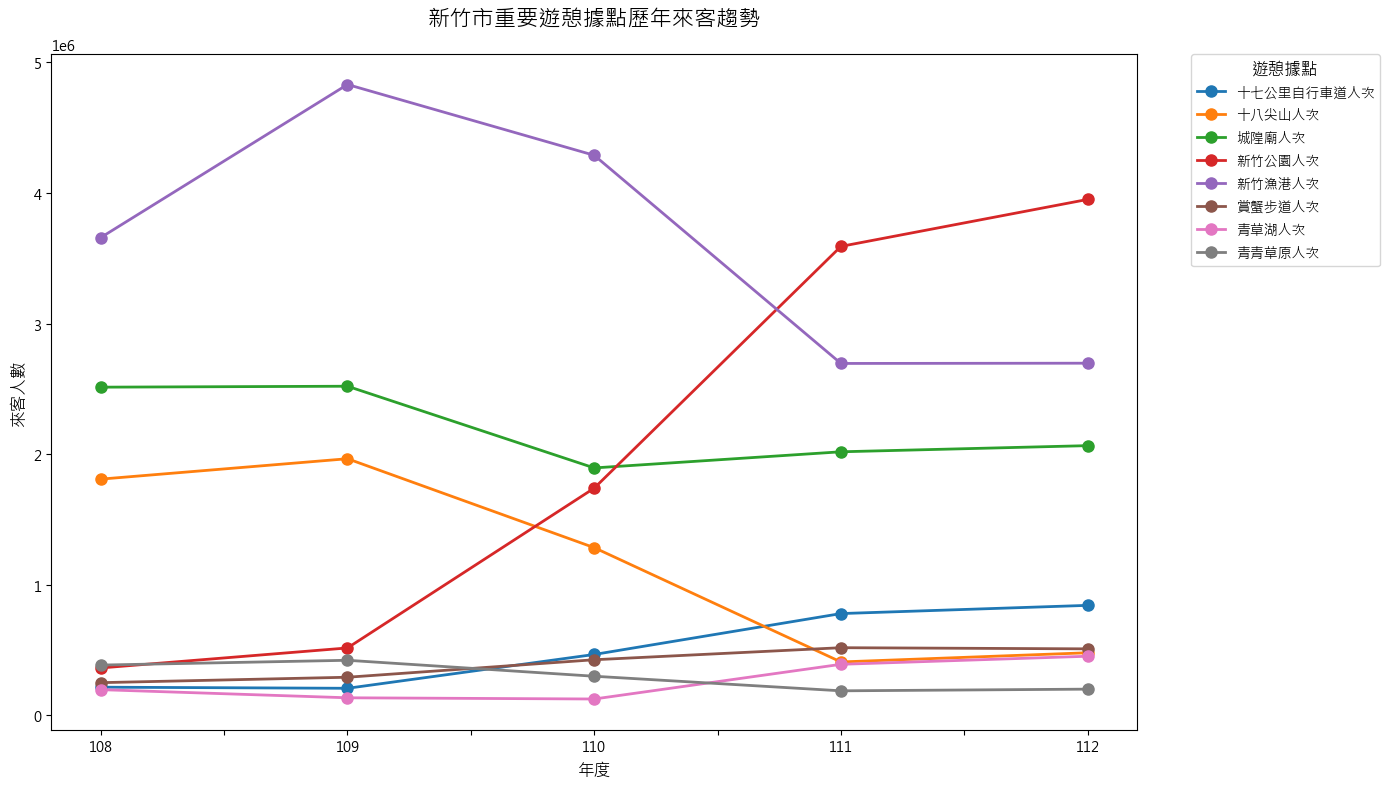

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 設定中文字體和圖表大小
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 使用微軟正黑體
plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題
rcParams['figure.figsize'] = 12, 8  # 設定圖表大小（寬12吋，高8吋）

# 讀取資料並預處理
df = pd.read_excel('新竹市重要遊憩據點遊客人次統計.xlsx')
df = df.drop(columns=['Countycode', 'YYYMM'])
df = df.round() # 將數字四捨五入
df = df.astype('int32')
df['民國年月'] = df['民國年月'].astype('string')

# 取消樞紐
df_unpivoted = pd.melt(df, 
                      id_vars=['民國年月'],
                      value_vars=df.columns.values[1:],
                      var_name='據點',
                      value_name='人數')

# 新增年月欄位
df_unpivoted['年'] = df_unpivoted['民國年月'].str.slice(0,3)
df_unpivoted['月'] = df_unpivoted['民國年月'].str.slice(3,5)

# 建立樞紐分析表
table = pd.pivot_table(df_unpivoted, values='人數', index=['年'],
                      columns=['據點'], aggfunc="sum")

# 繪製趨勢圖
ax = table.plot(kind='line', 
                marker='o', 
                linewidth=2,
                markersize=8,
                figsize=(14, 8))  # 進一步放大圖表

# 設定圖表標題和標籤
plt.title('新竹市重要遊憩據點歷年來客趨勢', fontsize=16, pad=20)
plt.ylabel('來客人數', fontsize=12)
plt.xlabel('年度', fontsize=12)

# 調整圖例位置和字體大小
plt.legend(bbox_to_anchor=(1.05, 1),  # 將圖例放在圖表右側
           loc='upper left',
           borderaxespad=0.,
           title='遊憩據點',
           title_fontsize=12,
           fontsize=10)

# 調整刻度標籤大小
ax.tick_params(axis='both', which='major', labelsize=10)

# 自動調整版面以防止標籤被截斷
plt.tight_layout()

# 顯示圖表
plt.show()

# 可選：儲存圖表
# plt.savefig('新竹市遊憩據點來客趨勢.png', dpi=300, bbox_inches='tight')              

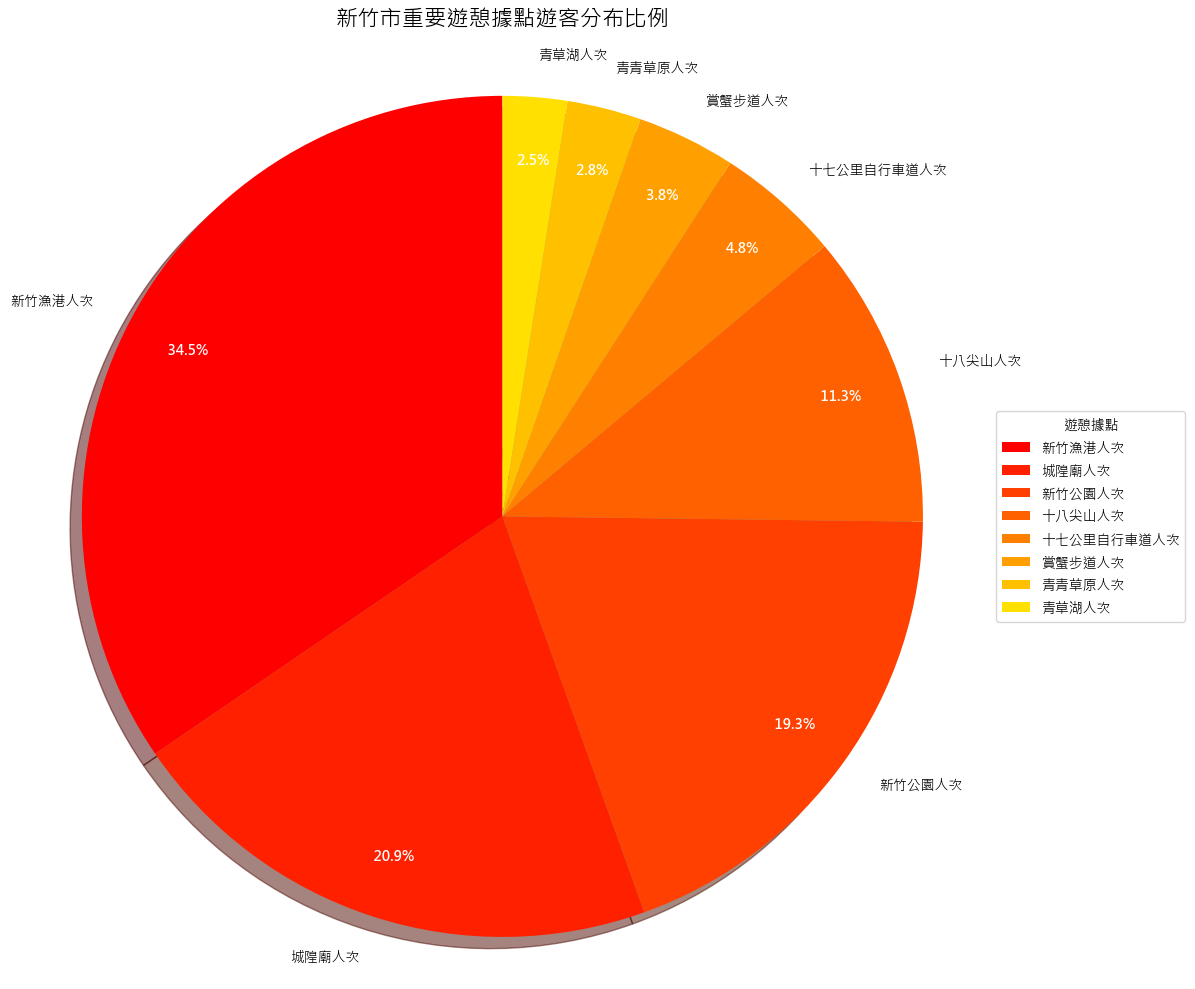

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 設定中文字體和圖表大小
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 使用微軟正黑體
plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題
rcParams['figure.figsize'] = 10, 8  # 設定圖表大小

# 讀取資料並預處理（使用您之前的代碼）
df = pd.read_excel('新竹市重要遊憩據點遊客人次統計.xlsx')
df = df.drop(columns=['Countycode', 'YYYMM'])
df = df.round().astype('int32')
df['民國年月'] = df['民國年月'].astype('string')

# 取消樞紐
df_unpivoted = pd.melt(df, 
                      id_vars=['民國年月'],
                      value_vars=df.columns.values[1:],
                      var_name='據點',
                      value_name='人數')

# 計算各據點總人數
location_totals = df_unpivoted.groupby('據點')['人數'].sum().sort_values(ascending=False)

# 設定美觀的顏色（根據 據點 數量自動生成）
# colors = plt.cm.Pastel1.colors[:len(location_totals)]

#  取得HSV色彩映射
_colormap = plt.cm.autumn

# 生成n個均勻分布的HSV顏色
n = len(location_totals)      # 據點數量
colors = [_colormap(i/n) for i in range(n)]   # 在0-1之間均勻取值

# # 繪製圓餅圖
# plt.pie(location_totals, colors=colors, labels=location_totals.index)
# plt.show()


# 創建圓餅圖
plt.figure(figsize=(12, 10))

# 繪製圓餅圖（增加陰影效果和起始角度）
wedges, texts, autotexts = plt.pie(
    location_totals,
    labels=location_totals.index,
    colors=colors,
    autopct='%5.1f%%',  # 顯示百分比
    startangle=90,       # 起始角度
    shadow=True,         # 陰影效果
    pctdistance=0.85,    # 百分比位置
    textprops={'fontsize': 10}  # 文字大小
)

# 設定標題
plt.title('新竹市重要遊憩據點遊客分布比例', fontsize=16, pad=20)

# 調整百分比文字顏色為白色（在深色區域更清晰）
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

# 添加圖例（放在圖表右側）
plt.legend(
    wedges,
    location_totals.index,
    title="遊憩據點",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

# 確保圖形是正圓形
plt.axis('equal')

# 自動調整版面
plt.tight_layout()

# 顯示圖表
plt.show()

# 可選：儲存圖表
# plt.savefig('新竹市遊憩據點遊客比例.png', dpi=300, bbox_inches='tight')

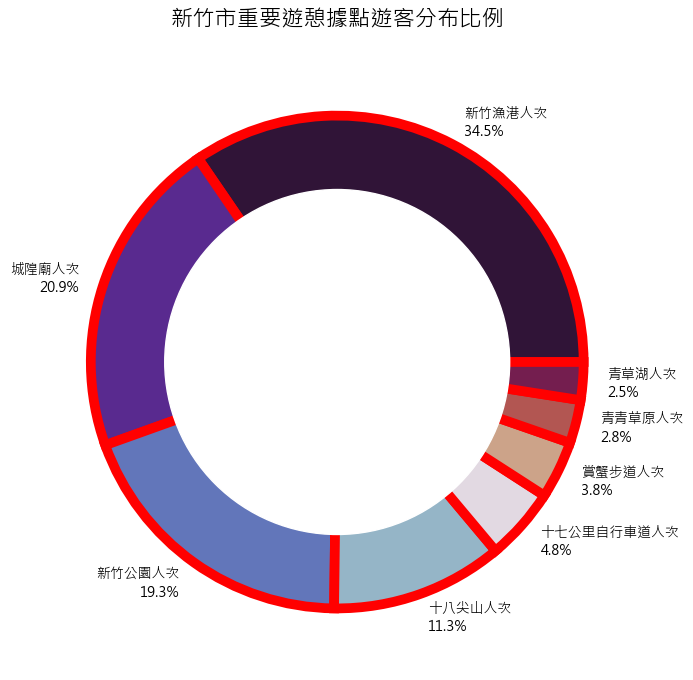

In [9]:
# library
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 設定中文字體和圖表大小
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 使用微軟正黑體
plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題
rcParams['figure.figsize'] = 10, 8  # 設定圖表大小

# create data

# 讀取資料並預處理（使用您之前的代碼）
df = pd.read_excel('新竹市重要遊憩據點遊客人次統計.xlsx')
df = df.drop(columns=['Countycode', 'YYYMM'])
df = df.round().astype('int32')
df['民國年月'] = df['民國年月'].astype('string')

# 取消樞紐
df_unpivoted = pd.melt(df, 
                      id_vars=['民國年月'],
                      value_vars=df.columns.values[1:],
                      var_name='據點',
                      value_name='人數')

# 計算各據點總人數
location_totals = df_unpivoted.groupby('據點')['人數'].sum().sort_values(ascending=False)

names = location_totals.index
size = location_totals

# 計算百分比
total = sum(size)
percentages = [(s/total)*100 for s in size]

# 合併標籤與百分比 (格式: 據點名稱 XX.X%)
labels = [f'{name}\n{perc:.1f}%' for name, perc in zip(names, percentages)]


# 設定美觀的顏色（根據 據點 數量自動生成）
# colors = plt.cm.hsv.colors[:len(location_totals)]

# 獲取HSV色彩映射
_colormap = plt.cm.twilight_shifted

# 生成n個均勻分布的HSV顏色
n = len(location_totals)  # 據點數量
colors = [_colormap(i/n) for i in range(n)]  # 在0-1之間均勻取值

# 設定標題
plt.title('新竹市重要遊憩據點遊客分布比例', fontsize=16, pad=20)

# Custom wedges
plt.pie(
        size, 
        labels=labels, 
        colors=colors, 
        startangle=0,       # 起始角度
        wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'red' }
       )

# Create a circle at the center of the plot
my_circle = matplotlib.patches.Circle( (0,0), 0.7, color='white')

# p = plt.gcf() # 拿到圖紙
plt.gca().add_artist(my_circle)
plt.show()